In [1]:
#import import_ipynb
#import imreduction
#import imfit
import sys
import numpy as np
import matplotlib.pyplot as plt #dumped imageio and tifffile packages and used matplotlib to read TIFF files
import seaborn as sns
import pandas as pd
import scipy.signal as signal

from lmfit import models
import math
import random
#from lmfit.models import GaussianModel, SkewedGaussianModel, LorentzianModel, VoigtModel

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

#%%writefile image_analysis.py

In [2]:
class Image:
    
    def __init__(self, image):
        self.raw = image
        self.shape= image.shape
        self.x_size= image.shape[0]
        self.y_size= image.shape[1]
        self.subtracted_data= np.array([[0 for y in range(self.y_size)] for x in range(self.x_size)])
        self.profile_x= [0 in range (self.x_size)]
        self.profile_y= [0 in range (self.y_size)]
        
    def subtract_bg(self,bg):
        if (bg.shape == self.shape): 
            for i in range(self.x_size):
                for j in range (self.y_size):
                    if ((self.raw[i][j]>bg[i][j]).all() and (bg[i][j]>=0).all() and (self.raw[i][j]>=0).all()):
                            self.subtracted_data[i][j]= self.raw[i][j]-bg[i][j]
            return self.subtracted_data
                    #else:
                     #   print("Error when subtracting")
        else:
            print("Error: Background image size does not match data size.")
    
    def get_profile(self):
        #PROFILE IN Y
        for i in range(self.y_size): #loop over all y
            sum=0
            for j in range(self.x_size): #loop over all x for each y: gives one number
                sum=sum+self.subtracted_data[j][i]
            self.profile_y.append(sum)
     
        #PROFILE IN X
        for i in range(self.x_size): #loop over all x
            sum=0
            for j in range(self.y_size): #loop over all y for each x: gives one number
                sum=sum+self.subtracted_data[i][j]
            self.profile_x.append(sum)

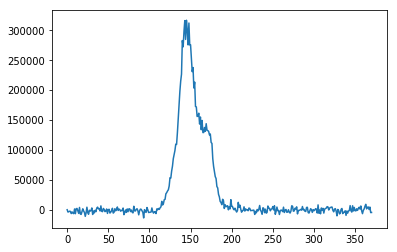

In [3]:
##Can I import based on date and viewer from image details?
im=[0 for i in range(0,20)]
i=0
for j in range (15,35):
    im[i]=plt.imread('tiff_files/Tune1'+str(j)+'_07722018_viewer_D1542_001.tiff')
    i+=1

#bg=plt.imread('tiff_files/Tune114_background_003.tiff') #background image
im[0]=plt.imread('tiff_files/071918_D1542_overnight_nominal__294.tiff')
bg=plt.imread('tiff_files/071918_D1542_overnight_nominal__295.tiff')

image1=Image(im[0])
##print(image1.subtracted_data)
image1.subtract_bg(bg)
#len(image1.profile_x)
image1.get_profile()
x1 = np.arange(image1.y_size)
x = np.arange(image1.x_size)

#image1.profile_x
profy=np.array(image1.profile_y[1:]-image1.profile_y[1]) #280:330
prof=np.array(image1.profile_x[1:]-image1.profile_x[1]) 

plt.plot(prof)
plt.show()

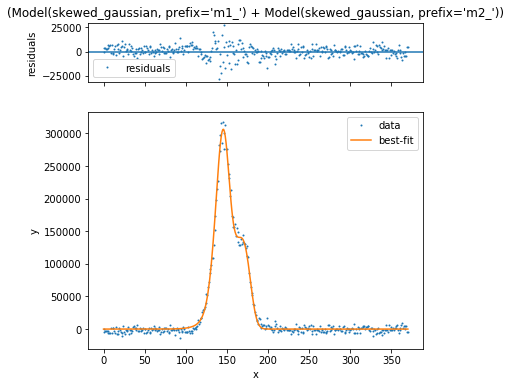

[[Model]]
    (Model(skewed_gaussian, prefix='m1_') + Model(skewed_gaussian, prefix='m2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 343
    # data points      = 371
    # variables        = 8
    chi-square         = 1.2416e+10
    reduced chi-square = 34205218.2
    Akaike info crit   = 6443.97922
    Bayesian info crit = 6475.30884
[[Variables]]
    m1_gamma:     -1.46406490 +/- 0.15919380 (10.87%) (init = 0)
    m1_sigma:      10.9580972 +/- 0.42908326 (3.92%) (init = 1)
    m1_center:     150.589516 +/- 0.34154087 (0.23%) (init = 145)
    m1_amplitude:  4803262.65 +/- 147071.878 (3.06%) (init = 250000)
    m1_height:     174868.374 +/- 5219.75822 (2.98%) == '0.3989423*m1_amplitude/max(1.e-15, m1_sigma)'
    m1_fwhm:       25.8043465 +/- 1.01041060 (3.92%) == '2.3548200*m1_sigma'
    m2_gamma:     -4.01081452 +/- 0.34715234 (8.66%) (init = 0)
    m2_sigma:      25.5591239 +/- 1.11166063 (4.35%) (init = 1)
    m2_center:     178.089995 +/- 0.30707

In [28]:
gauss1 = models.SkewedGaussianModel(prefix='m1_') #SkewedGaussianModel(prefix='g1_')
gauss2= models.SkewedGaussianModel(prefix='m2_')

mod= gauss1 + gauss2 

    
params_1 = gauss1.make_params(amplitude=250000,center=145, sigma=1)
params_2 = gauss2.make_params(amplitude=100000, center=170, sigma=1)
params = params_1.update(params_2)
    


output = mod.fit(prof, params_1, x=x)
fig, gridspec = output.plot(data_kws={'markersize': 1})

#out  = mod.fit(prof, param#s, x=x, weights=np.sqrt(1.0/prof.size))

plt.show()
print(output.fit_report())

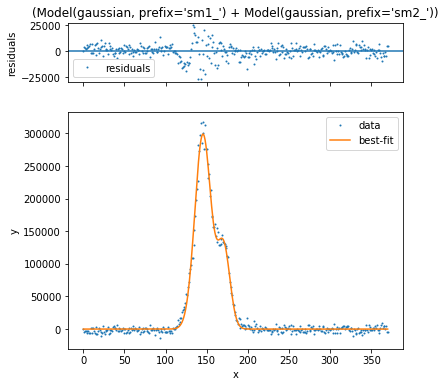

[[Model]]
    (Model(skewed_gaussian, prefix='m1_') + Model(skewed_gaussian, prefix='m2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 343
    # data points      = 371
    # variables        = 8
    chi-square         = 1.2416e+10
    reduced chi-square = 34205218.2
    Akaike info crit   = 6443.97922
    Bayesian info crit = 6475.30884
[[Variables]]
    m1_gamma:     -1.46406490 +/- 0.15919380 (10.87%) (init = 0)
    m1_sigma:      10.9580972 +/- 0.42908326 (3.92%) (init = 1)
    m1_center:     150.589516 +/- 0.34154087 (0.23%) (init = 145)
    m1_amplitude:  4803262.65 +/- 147071.878 (3.06%) (init = 250000)
    m1_height:     174868.374 +/- 5219.75822 (2.98%) == '0.3989423*m1_amplitude/max(1.e-15, m1_sigma)'
    m1_fwhm:       25.8043465 +/- 1.01041060 (3.92%) == '2.3548200*m1_sigma'
    m2_gamma:     -4.01081452 +/- 0.34715234 (8.66%) (init = 0)
    m2_sigma:      25.5591239 +/- 1.11166063 (4.35%) (init = 1)
    m2_center:     178.089995 +/- 0.30707

In [7]:
sgauss1 = models.GaussianModel(prefix='sm1_') #SkewedGaussianModel(prefix='g1_')
sgauss2= models.GaussianModel(prefix='sm2_')

smod= sgauss1 + sgauss2 

    
sparams_1 = sgauss1.make_params(amplitude=250000,center=145, sigma=1)
sparams_2 = sgauss2.make_params(amplitude=100000, center=170, sigma=1)
sparams = sparams_1.update(sparams_2)
    


soutput = smod.fit(prof, sparams_1, x=x)
sfig, sridspec = soutput.plot(data_kws={'markersize': 1})

#out  = mod.fit(prof, param#s, x=x, weights=np.sqrt(1.0/prof.size))

plt.show()
print(output.fit_report())

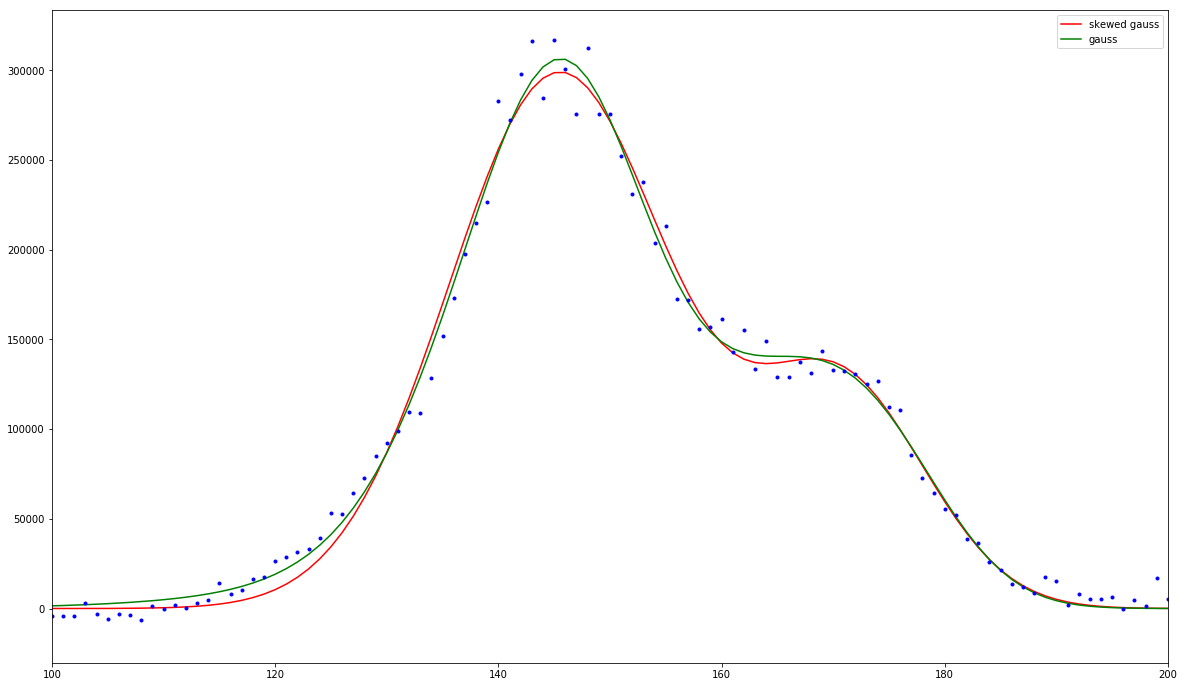

In [25]:
fig=plt.figure(figsize=(20,12))
plt.plot(x, soutput.best_fit, 'r-', label='skewed gauss')
plt.plot(x, output.best_fit, 'g-', label='gauss')

plt.plot(x, prof, 'b.')
plt.legend()
plt.xlim(100,200)
plt.show()

Clearly the Gaussian peak gives better resutls. Fit report didn't seem very significant but I should look into comparisons later anyway.

In [30]:
g1_c, g2_c=[np.array(output.params['m1_center']), np.array(output.params['m2_center'])]


In [32]:
print(g2_c)

178.08999490696598
